<a href="https://colab.research.google.com/github/dharaniathananchayan/GreenCoder-EDA/blob/main/GreenCoder_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('greencoder_standard_1M.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   line_of_code           1000000 non-null  int64  
 1   cyclomatic_complexity  1000000 non-null  int64  
 2   unused_imports         1000000 non-null  int64  
 3   uses_bubble_sort       1000000 non-null  int64  
 4   uses_linear_search     1000000 non-null  int64  
 5   has_redundant_loops    1000000 non-null  int64  
 6   cpu_usage_pct          1000000 non-null  float64
 7   memory_usage_mb        1000000 non-null  float64
 8   runtime_sec            1000000 non-null  float64
 9   energy_consumed_kwh    1000000 non-null  float64
 10  carbon_emissions_g     1000000 non-null  float64
 11  is_efficient           1000000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 91.6 MB
None
line_of_code             0
cyclomatic_complexity    0
unused_imports        

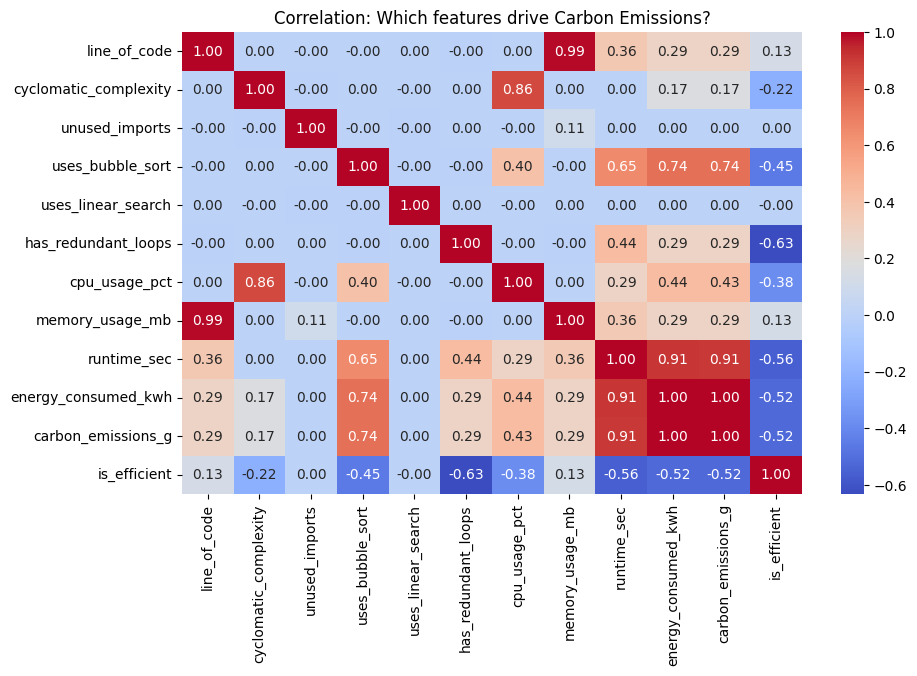

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation: Which features drive Carbon Emissions?")
plt.show()

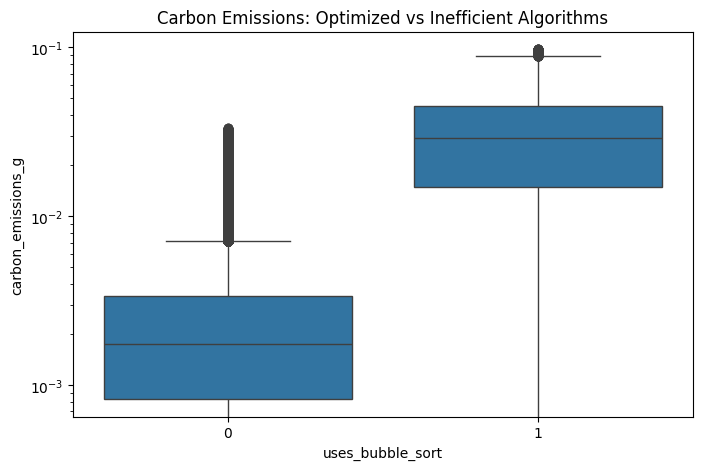

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='uses_bubble_sort', y='carbon_emissions_g', data=df)
plt.yscale('log') # Log scale because bubble sort emissions are much higher
plt.title("Carbon Emissions: Optimized vs Inefficient Algorithms")
plt.show()

/tmp/ipython-input-3186402272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_efficient', data=df, ax=ax[0], palette='viridis')
/tmp/ipython-input-3186402272.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Inefficient (0)', 'Efficient (1)'])


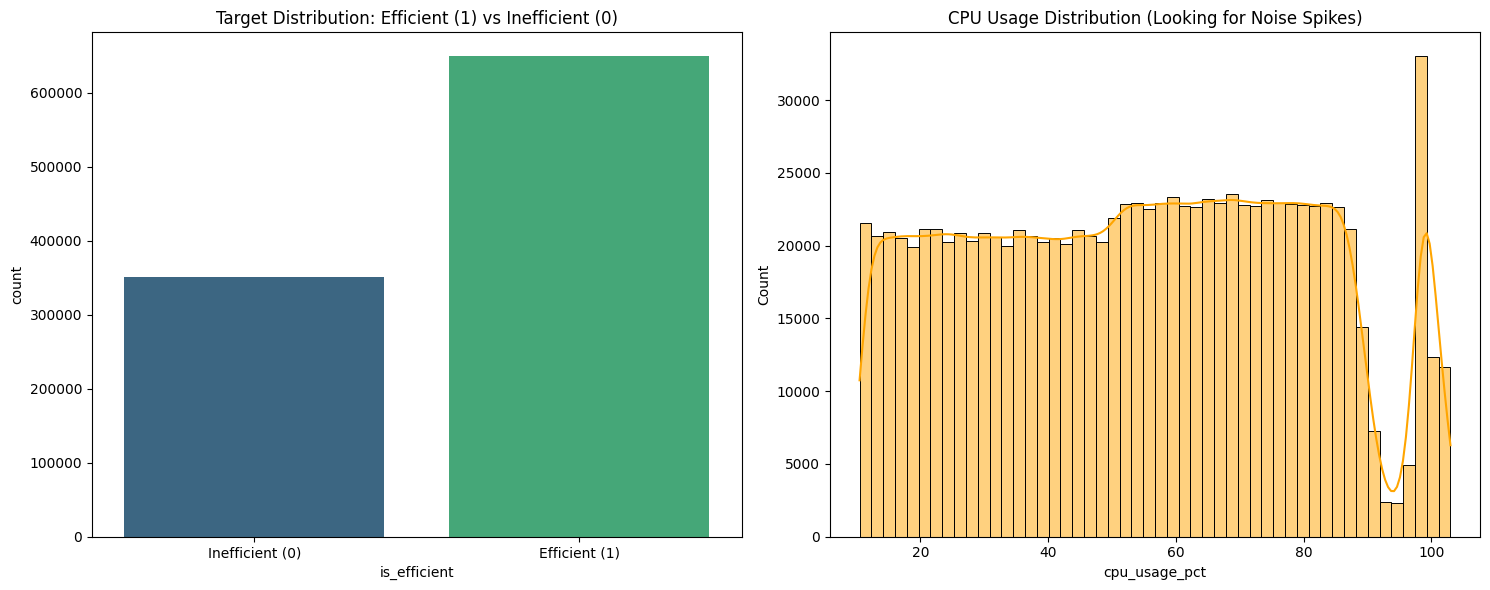

In [8]:
# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 1. Check Target Balance (is_efficient)
sns.countplot(x='is_efficient', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Target Distribution: Efficient (1) vs Inefficient (0)')
ax[0].set_xticklabels(['Inefficient (0)', 'Efficient (1)'])

# 2. Check CPU Usage Distribution & Noise Spikes
sns.histplot(df['cpu_usage_pct'], bins=50, kde=True, ax=ax[1], color='orange')
ax[1].set_title('CPU Usage Distribution (Looking for Noise Spikes)')

plt.tight_layout()
plt.show()

In [9]:
# Drop the target and calculated carbon metrics to see what features are available for the ML model
features = df.drop(['is_efficient', 'energy_consumed_kwh', 'carbon_emissions_g'], axis=1)

print("Features available for AI Training:")
print(features.columns.tolist())

# Show a quick summary of the features
features.describe()

Features available for AI Training:
['line_of_code', 'cyclomatic_complexity', 'unused_imports', 'uses_bubble_sort', 'uses_linear_search', 'has_redundant_loops', 'cpu_usage_pct', 'memory_usage_mb', 'runtime_sec']


,line_of_code,cyclomatic_complexity,unused_imports,uses_bubble_sort,uses_linear_search,has_redundant_loops,cpu_usage_pct,memory_usage_mb,runtime_sec
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,509.482184,49.996193,1.500508,0.100003,0.300420,0.200202,54.352436,1220.329491,1.624394
std,282.949043,28.573806,1.224130,0.300004,0.458441,0.400152,25.180758,585.106358,2.402224
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.480000,125.440000,0.020100
25%,264.000000,25.000000,1.000000,0.000000,0.000000,0.000000,32.820000,717.740000,0.404300
50%,509.000000,50.000000,1.000000,0.000000,0.000000,0.000000,54.800000,1219.885000,0.731600
75%,755.000000,75.000000,2.000000,0.000000,1.000000,0.000000,74.970000,1722.062500,1.202200
max,999.000000,99.000000,10.000000,1.000000,1.000000,1.000000,103.000000,2618.420000,40.114800


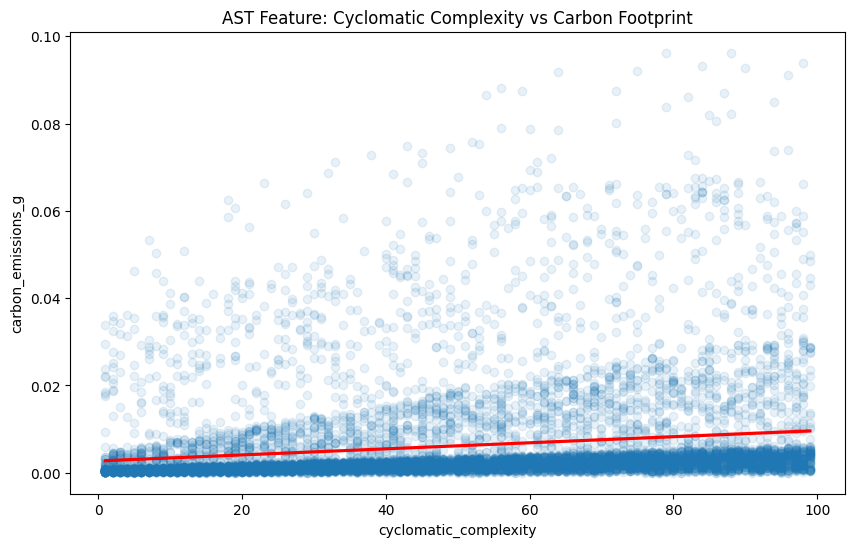

In [10]:
plt.figure(figsize=(10, 6))
# Using a regression plot to show the trend
sns.regplot(x='cyclomatic_complexity', y='carbon_emissions_g', data=df.sample(10000),
            scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title("AST Feature: Cyclomatic Complexity vs Carbon Footprint")
plt.show()

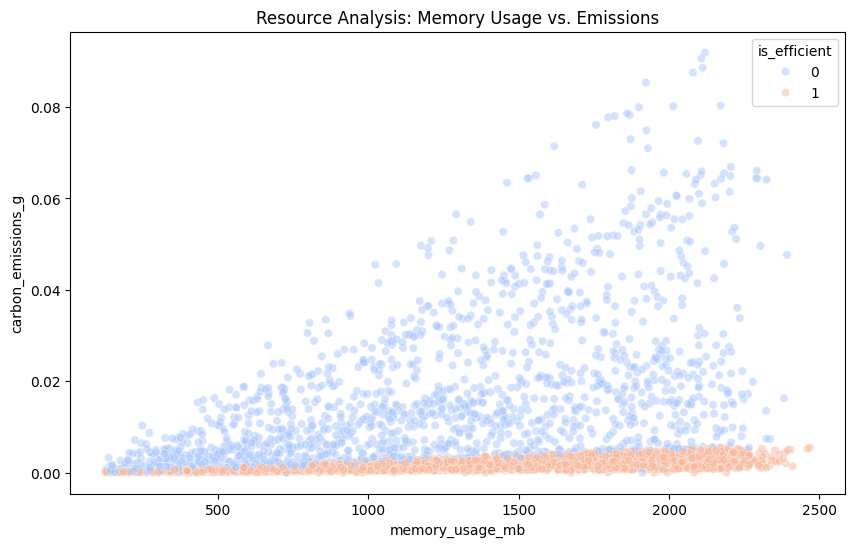

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='memory_usage_mb', y='carbon_emissions_g', hue='is_efficient',
                data=df.sample(5000), palette='coolwarm', alpha=0.5)
plt.title("Resource Analysis: Memory Usage vs. Emissions")
plt.show()